## Index for initial_stats.ipynb code

Description: View basic statistics of the variables data

### 1. Preparation of the data for NUTS4 data
   - Load the data
   - Add the names of the regions NUTS4 to the data

### 2. Statistics for permanent crops

### 3. Statistics for education

### 4. Statistics for labour

### 5. Statistics for production 

### 6. T-test between the variables
---------------------------------------------

## 1. Preparation of the data for NUTS4 data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
permcrop4_df = pd.read_csv('../CSVs/Permanent_Crop_NUTS4_2019.csv', sep=",")
tempcrop4_df = pd.read_csv('../CSVs/Temporary_Crop_NUTS4_2019.csv', sep=",")
education4_df = pd.read_csv('../CSVs/Education_NUTS4_2019.csv', sep=",")
labour4_df = pd.read_csv('../CSVs/Labour_NUTS4_2019.csv', sep=",")
prod4_df = pd.read_csv('../CSVs/Production_NUTS4_2019.csv', sep=",")

## 2. Statistics for permanent crops

In [3]:
permcrop4_df[['pc.area', 'pc.hold']].describe()

,pc.area,pc.hold
count,2464.000000,2464.000000
mean,698.581575,246.725244
std,2267.140381,475.867350
min,0.000000,0.000000
25%,3.000000,6.000000
50%,30.000000,46.000000
75%,297.000000,248.500000
max,31334.000000,4603.000000


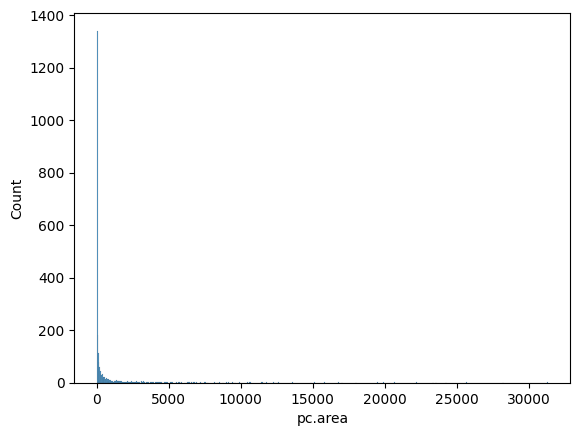

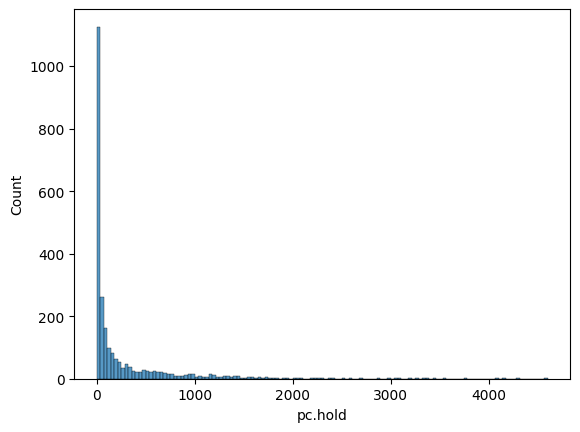

In [4]:
sns.histplot(data=permcrop4_df, x="pc.area")
plt.show()
sns.histplot(data=permcrop4_df, x="pc.hold")
plt.show()

In [5]:
tempcrop4_df[['tc.area', 'tc.hold']].describe()

,tc.area,tc.hold
count,3388.000000,3388.000000
mean,524.430933,113.596517
std,1765.755495,240.887326
min,0.000000,0.000000
25%,0.000000,1.000000
50%,11.000000,12.000000
75%,192.250000,103.000000
max,29288.000000,3039.000000


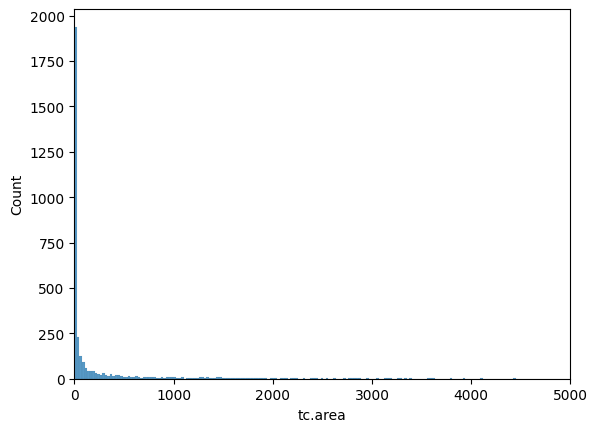

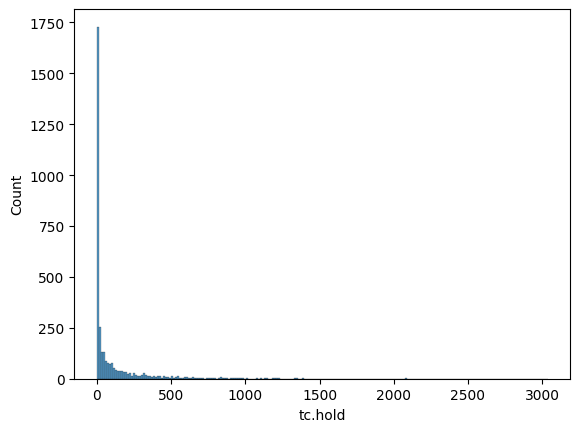

In [6]:
sns.histplot(data=tempcrop4_df, x="tc.area")
plt.xlim(0, 5000)
plt.show()
sns.histplot(data=tempcrop4_df, x="tc.hold")
plt.show()

## 3. Statistics for education

In [18]:
education4_df.fillna('None',inplace=True)
education4_df[['e.value', 'el.education_level']].groupby('el.education_level').describe().T

el.education_level        Basic         None  Secondary / post-secondary  \
e.value count        308.000000   308.000000                  308.000000   
        mean        1356.896104   250.366883                  310.038961   
        std         1142.497614   231.198432                  256.325383   
        min            8.000000     0.000000                    3.000000   
        25%          541.750000    79.500000                  118.000000   
        50%         1071.500000   184.000000                  246.500000   
        75%         1930.750000   363.250000                  431.250000   
        max         6675.000000  1415.000000                 1580.000000   

el.education_level     Superior         Total  
e.value count        308.000000    308.000000  
        mean         243.642857   2160.944805  
        std          222.384126   1809.150127  
        min            1.000000     15.000000  
        25%           85.000000    842.250000  
        50%          176.500000   1710.000000  
        75%          340.000000   3072.000000  
        max         1645.000000  10517.000000

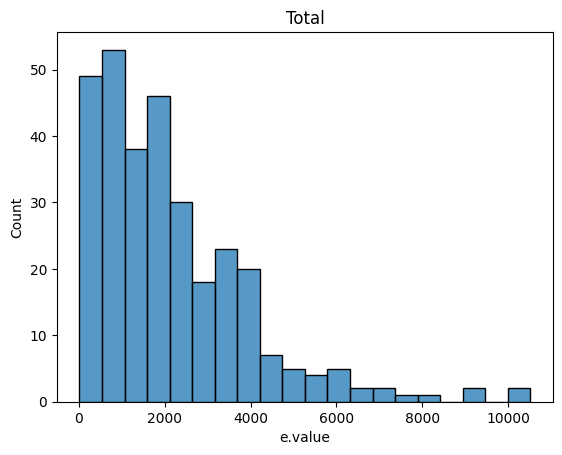

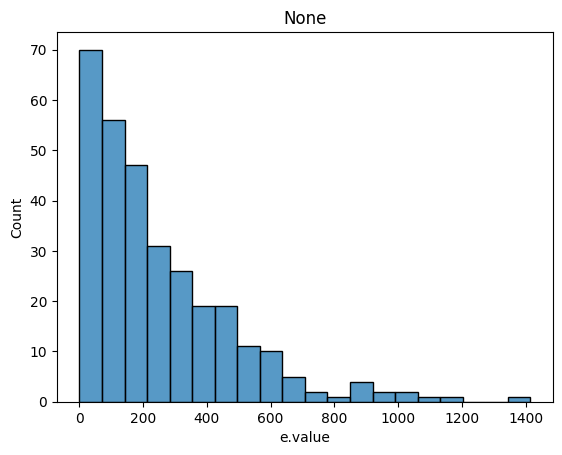

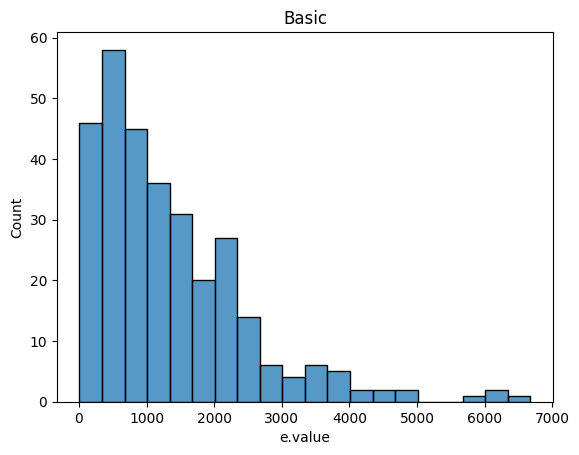

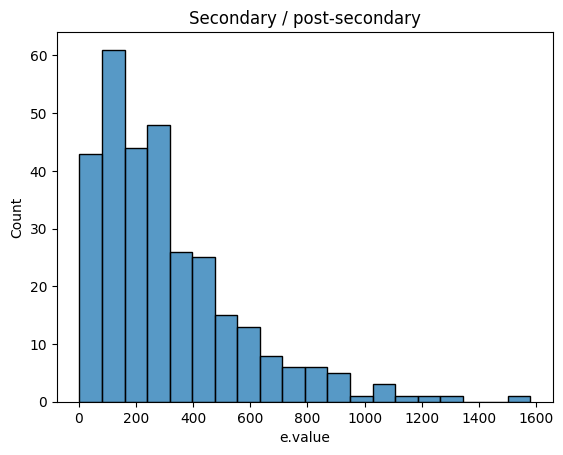

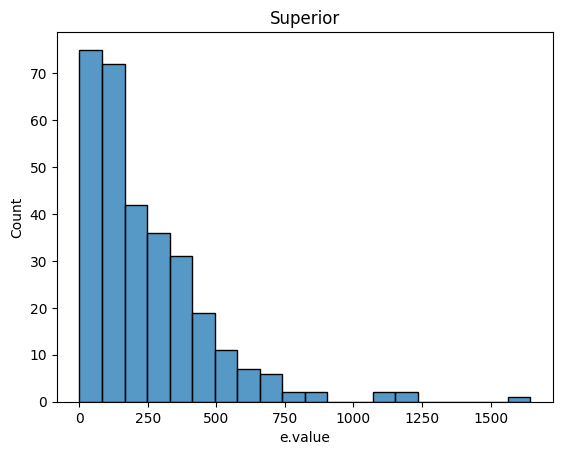

In [8]:
education_groups = education4_df['el.education_level'].unique()
for group in education_groups:
    sns.histplot(education4_df[education4_df['el.education_level'] == group]['e.value'], bins=20)
    plt.title(group)
    plt.show()

## 4. Statistics for labour

In [9]:
labour4_df[['l.value', 'ltn.type_labour']].groupby('ltn.type_labour').describe().T

ltn.type_labour  Family labour force       Holder  Non-family labour force  \
l.value count             308.000000   308.000000               308.000000   
        mean              694.821429   390.353896               326.409091   
        std               608.373131   330.349664               490.106844   
        min                 5.000000     3.000000                 0.000000   
        25%               236.500000   147.750000                78.000000   
        50%               535.000000   299.500000               187.500000   
        75%               982.750000   553.500000               399.000000   
        max              3424.000000  1909.000000              6243.000000   

ltn.type_labour  Non-regular  Other family members      Regular       Spouse  \
l.value count     308.000000            308.000000   308.000000   308.000000   
        mean       98.558442            106.493506   194.220779   198.097403   
        std       135.252688             97.196349   326.298104   194.291992   
        min         0.000000              0.000000     0.000000     1.000000   
        25%        18.750000             33.750000    47.000000    55.000000   
        50%        49.000000             82.500000   101.000000   139.000000   
        75%       131.000000            146.500000   245.250000   278.750000   
        max       881.000000            533.000000  4515.000000  1286.000000   

ltn.type_labour  Total labour force in agriculture  \
l.value count                           308.000000   
        mean                           1021.113636   
        std                             856.642558   
        min                               8.000000   
        25%                             407.000000   
        50%                             818.000000   
        75%                            1444.750000   
        max                            7237.000000   

ltn.type_labour  Workers not hired by the holder  
l.value count                         308.000000  
        mean                           33.678571  
        std                            81.096299  
        min                             0.000000  
        25%                             4.750000  
        50%                            12.000000  
        75%                            27.000000  
        max                           848.000000

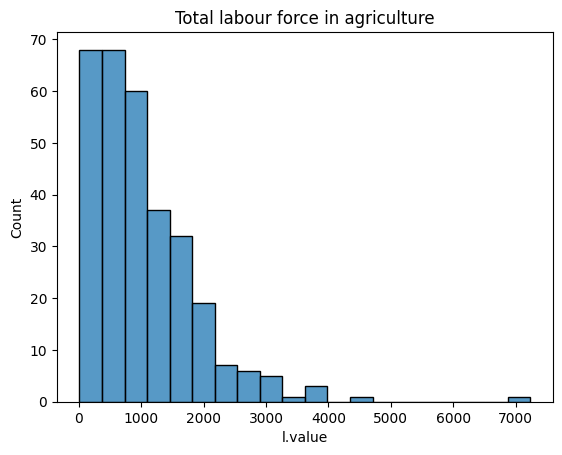

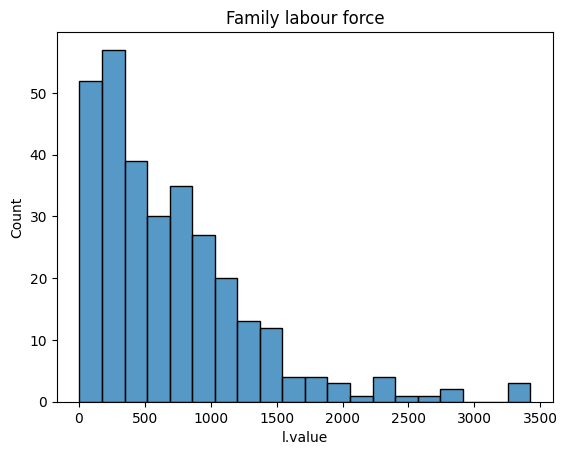

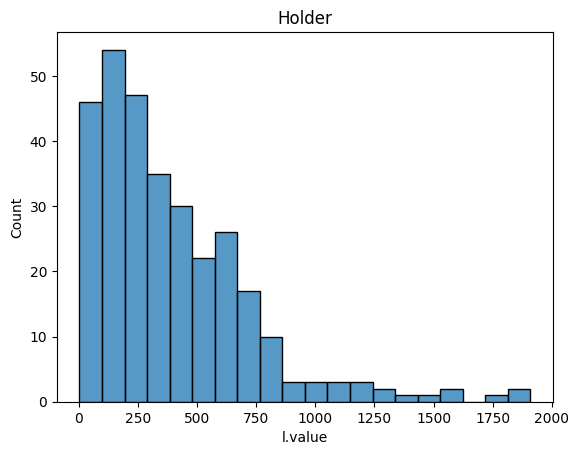

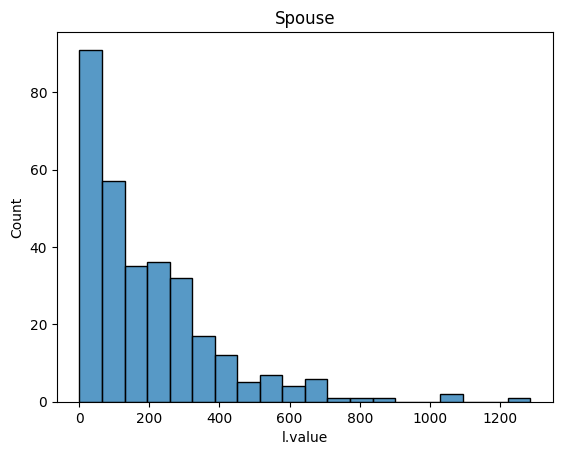

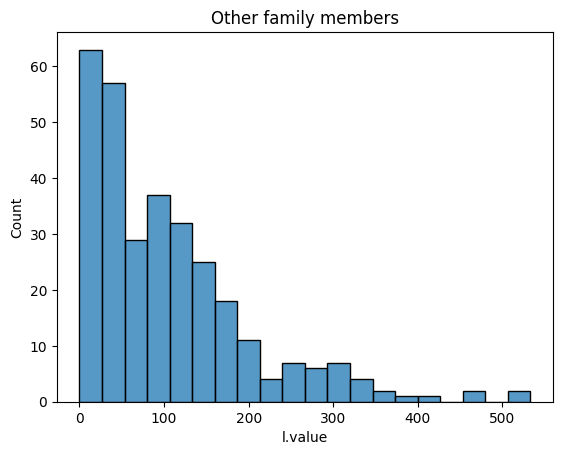

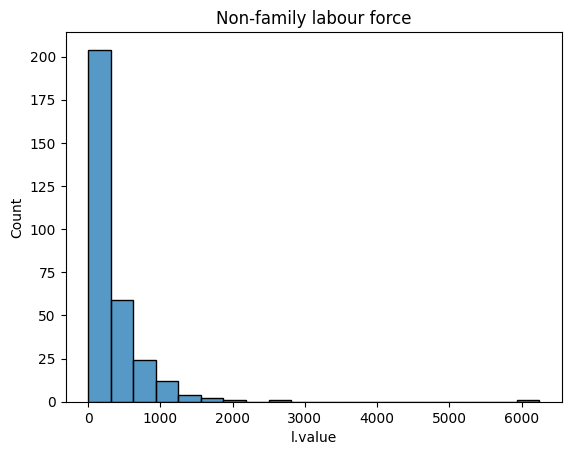

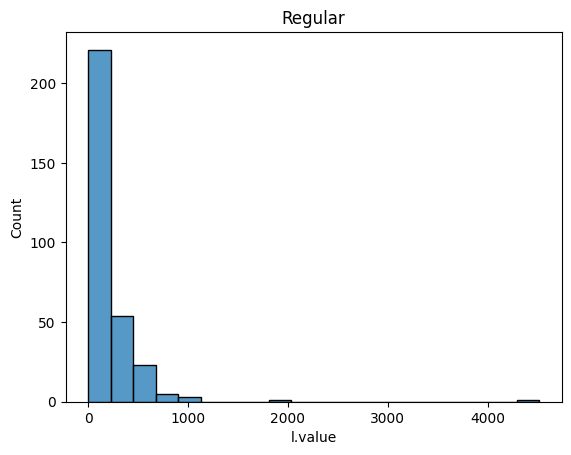

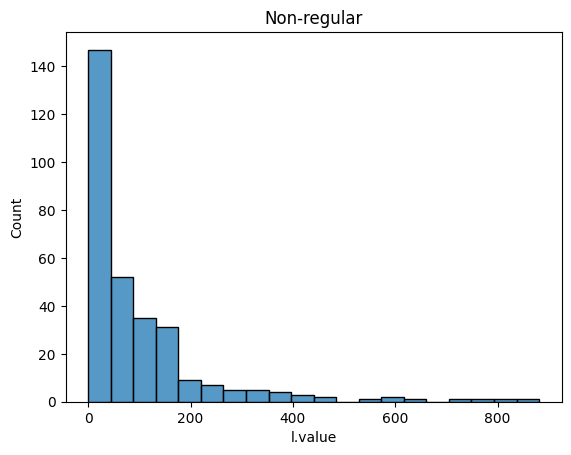

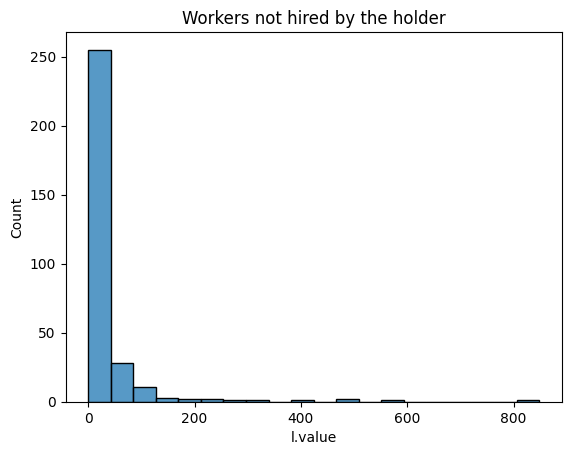

In [10]:
labour_groups = labour4_df['ltn.type_labour'].unique()
for group in labour_groups:
    sns.histplot(labour4_df[labour4_df['ltn.type_labour'] == group]['l.value'], bins=20)
    plt.title(group)
    plt.show()

## 5. Statistics for production 

In [11]:
prod4_df[['p.value_eur', 'p.area_ha']].describe()

,p.value_eur,p.area_ha
count,3.080000e+02,308.000000
mean,2.194275e+07,4340.899026
std,2.685285e+07,5352.005584
min,5.337900e+04,246.300000
25%,7.592616e+06,1102.575000
50%,1.362540e+07,2569.400000
75%,2.604405e+07,5203.600000
max,2.163985e+08,42876.400000


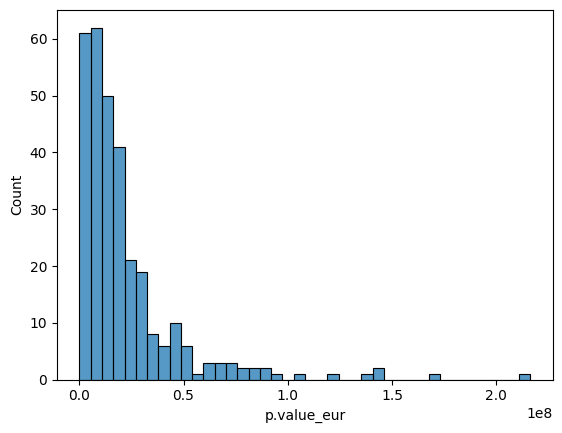

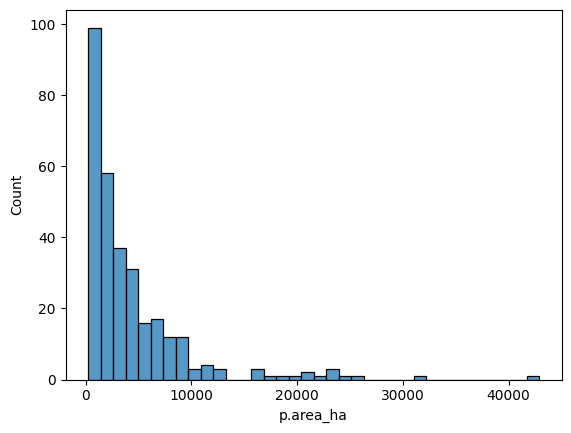

In [13]:
sns.histplot(data=prod4_df, x="p.value_eur")
plt.show()
sns.histplot(data=prod4_df, x="p.area_ha")
plt.show()

## 6. T-test between the variables

In [17]:
distribution_list = [permcrop4_df['pc.area'],
                     permcrop4_df['pc.hold'],
                     tempcrop4_df['tc.area'],
                     tempcrop4_df['tc.hold'],
                     education4_df['e.value'],
                     labour4_df['l.value'],
                     prod4_df['p.value_eur'],
                     prod4_df['p.area_ha']]

for dist in distribution_list:
    stat, p = scipy.stats.shapiro(dist)
    print(f'{dist.name} - Normal Distribution Test:')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)\n')
    else:
        print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)\n')

pc.area - Normal Distribution Test:
Statistics=0.326, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)

pc.hold - Normal Distribution Test:
Statistics=0.561, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)

tc.area - Normal Distribution Test:
Statistics=0.318, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)

tc.hold - Normal Distribution Test:
Statistics=0.522, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)

e.value - Normal Distribution Test:
Statistics=0.660, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)

l.value - Normal Distribution Test:
Statistics=0.625, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)

p.value_eur - Normal Distribution Test:
Statistics=0.666, p=0.000
Samp